In [10]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [6]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [7]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<AxesSubplot:>

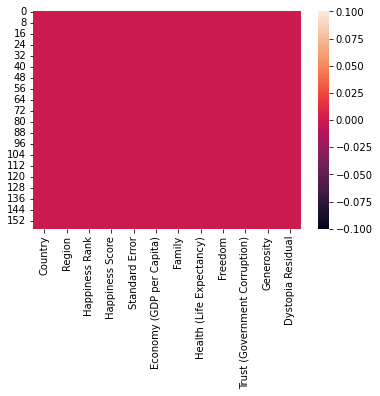

In [11]:
sns.heatmap(df.isnull())

In [13]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [14]:
data_visualization_nominal = df[['Country','Region']].copy()

In [15]:
data_visualization_nominal.columns

Index(['Country', 'Region'], dtype='object')

<bound method IndexOpsMixin.value_counts of 0                       Western Europe
1                       Western Europe
2                       Western Europe
3                       Western Europe
4                        North America
                    ...               
153                 Sub-Saharan Africa
154                 Sub-Saharan Africa
155    Middle East and Northern Africa
156                 Sub-Saharan Africa
157                 Sub-Saharan Africa
Name: Region, Length: 158, dtype: object>


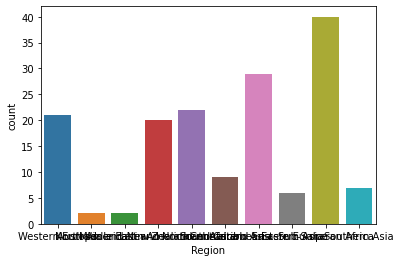

In [17]:
ax = sns.countplot(x='Region',data=data_visualization_nominal)
print(data_visualization_nominal['Region'].value_counts)

In [19]:
data_visualization_continuous=df[['Happiness Rank','Happiness Score','Standard Error','Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)','Freedom','Trust (Government Corruption)', 'Generosity','Dystopia Residual
']].copy()

SyntaxError: EOL while scanning string literal (Temp/ipykernel_25720/2652040333.py, line 1)

In [20]:
from sklearn.preprocessing import OrdinalEncoder
encoder= OrdinalEncoder()

In [25]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]= encoder.fit_transform(df[i].values.reshape(-1,1))

In [26]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118.0,8.0,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13.0,8.0,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136.0,4.0,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21.0,8.0,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [27]:
df.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


<AxesSubplot:>

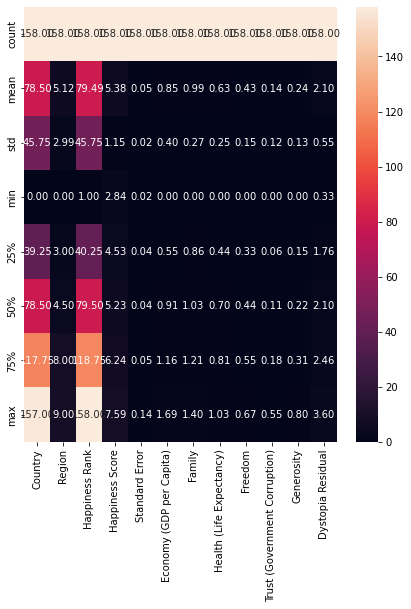

In [29]:
plt.figure(figsize=(7,8))
sns.heatmap(df.describe(),annot=True,linewidth=0, linecolor='white', fmt='0.2f')

In [30]:
df.corr()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


In [35]:
df.corr()['Happiness Score'].sort_values()

Happiness Rank                  -0.992105
Standard Error                  -0.177254
Region                          -0.176791
Country                          0.083380
Generosity                       0.180319
Trust (Government Corruption)    0.395199
Dystopia Residual                0.530474
Freedom                          0.568211
Health (Life Expectancy)         0.724200
Family                           0.740605
Economy (GDP per Capita)         0.780966
Happiness Score                  1.000000
Name: Happiness Score, dtype: float64

plt.figure(figsize=(7,8))
sns.heatmap(df.corr(),annot=True,linewidth=0, linecolor='white', fmt='0.2f')

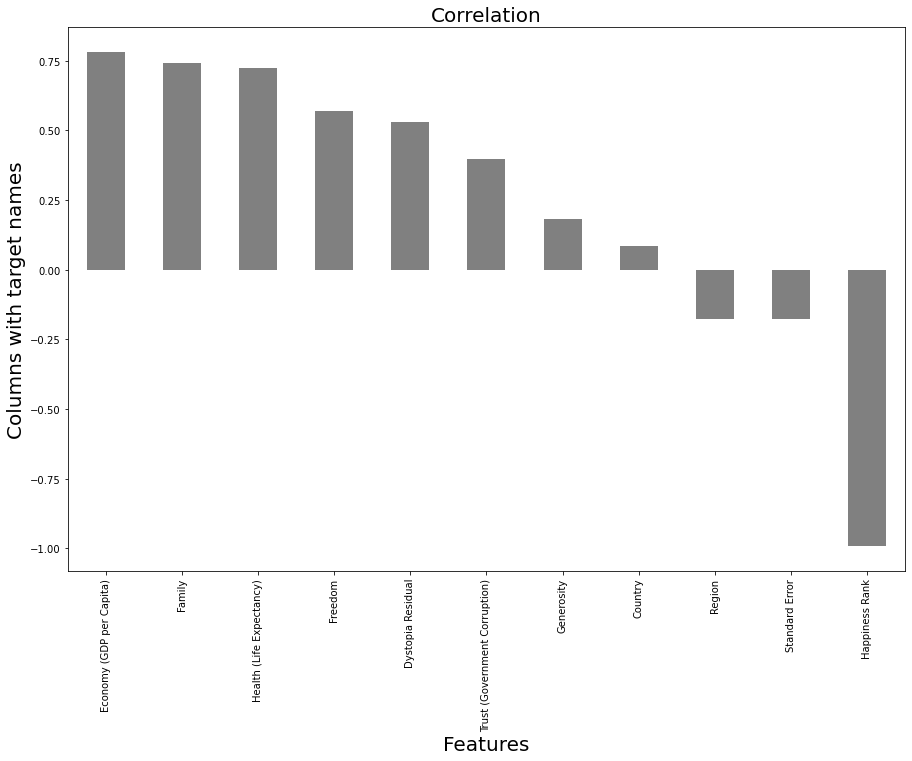

In [33]:
plt.figure(figsize= (15,10))
df.corr()['Happiness Score'].sort_values(ascending=False).drop(['Happiness Score']).plot(kind='bar',color='Grey')
plt.xlabel('Features', fontsize=20)
plt.ylabel('Columns with target names', fontsize=20)
plt.title('Correlation', fontsize=20)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

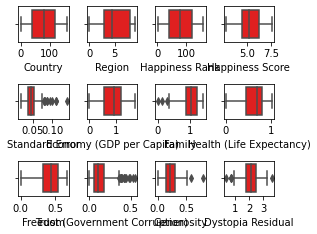

In [37]:
collist = df.columns.values
ncol= 4
nrow = 4
plt.figure(figsize=(ncol,ncol))
for i in range(0, len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color='red', orient="h")
    plt.tight_layout()

In [38]:
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

skewness threshold is taken +/-0.5

In [39]:
df = df.drop(['Happiness Rank', 'Standard Error'],axis=1)

In [40]:
df

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,118.0,8.0,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13.0,8.0,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136.0,4.0,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21.0,8.0,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# Remove Outliers

In [42]:
from scipy.stats import zscore
import numpy as np
z= np.abs(zscore(df))
z.shape

(158, 10)

In [43]:
threshold=3
print(np.where(z>3))

(array([ 27, 128, 147, 153, 155, 157], dtype=int64), array([7, 8, 4, 7, 9, 4], dtype=int64))


In [44]:
df_new = df[(z<3).all(axis=1)]
df_new

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
150,66.0,8.0,3.655,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20.0,8.0,3.587,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0.0,7.0,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13.0,8.0,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [45]:
df_new.shape

(152, 10)

In [46]:
loss_percent= (158-152)/158*100

In [47]:
loss_percent

3.79746835443038

In [48]:
x= df_new.iloc[:,0:-1]
y= df_new.iloc[:,-1]

# Transfroming data to remove skewness

In [50]:
from sklearn.preprocessing import power_transform
x= power_transform(x,method='yeo-johnson')

In [51]:
x

array([[ 1.1887051 ,  1.23986819,  1.8387073 , ...,  1.76230969,
         1.8220699 ,  0.65595135],
       [-0.31421047,  1.23986819,  1.81883275, ...,  1.44688503,
         0.35523024,  1.57166845],
       [-0.81704158,  1.23986819,  1.79278922, ...,  1.6221701 ,
         1.95457489,  0.97742359],
       ...,
       [-2.10859031,  0.67236186, -1.79965538, ..., -1.27152318,
        -0.16357633,  1.13659521],
       [-1.51998719,  0.96090613, -2.06377822, ...,  0.3154582 ,
        -0.40394411, -0.32359556],
       [-1.26108344,  0.96090613, -2.57588281, ..., -1.85450203,
        -0.11827784, -0.18319784]])

In [52]:
pd.DataFrame(x).skew()

0   -0.267218
1   -0.216720
2   -0.018239
3   -0.144167
4   -0.149268
5   -0.184207
6   -0.077878
7    0.179115
8    0.022444
dtype: float64

In [53]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=.30,random_state=45)

In [54]:
xtrain.shape

(106, 9)

In [55]:
xtest.shape

(46, 9)

In [56]:
ytrain.shape

(106,)

In [57]:
ytest.shape

(46,)

In [58]:
ln=LinearRegression()

In [59]:
ln.fit(xtrain,ytrain)

LinearRegression()

In [60]:
ln.coef_

array([-0.02064276,  0.04438295,  1.09619927, -0.38752762, -0.24878452,
       -0.25383277, -0.14250724, -0.06240654, -0.09925617])

In [61]:
ln.intercept_

2.1174451016935074

In [62]:
df_new.columns

Index(['Country', 'Region', 'Happiness Score', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype='object')

In [63]:
ln.score(xtrain,ytrain)

0.9692684961971676

In [64]:
pred= ln.predict(xtest)

In [65]:
print("Predicted Salary", pred)
print("Actual Salry",ytest)

Predicted Salary [2.36286903 2.12362437 1.99407287 2.32828821 1.98162422 1.52137989
 2.82493277 2.51369387 1.75172773 1.76560803 2.79938679 1.60256045
 2.23574905 2.24128748 1.91620355 1.67954494 1.93419538 1.71064449
 3.12151699 2.45280484 2.01042227 1.26512592 2.29857593 2.19046574
 2.36527133 2.75210477 1.93108034 1.63625346 2.89375055 2.98222471
 2.44512194 1.95272822 1.75930029 1.19993822 2.04317393 1.35698325
 3.54653144 2.65259686 1.92002898 2.28559049 2.49810861 2.72056836
 2.43489387 2.25745061 1.57743509 2.4839453 ]
Actual Salry 0      2.51738
44     2.24639
132    1.95071
3      2.46531
35     2.12367
45     1.68435
39     2.79094
108    2.51767
126    1.75873
143    1.87877
29     2.83600
129    1.59541
116    2.27513
117    2.20857
136    1.94939
36     1.64880
70     1.76145
146    1.85100
41     3.03500
90     2.11032
86     2.02500
156    1.83302
118    2.24173
52     2.18896
4      2.45176
115    2.77729
94     1.89894
65     1.59888
10     3.08854
93     3.05137
114  

In [66]:
print("Mean Absolute Error", mean_absolute_error(ytest,pred))
print("Mean Squared Error", mean_squared_error(ytest,pred))
print("Root Sqyare Error",np.sqrt(mean_squared_error(ytest,pred)))

Mean Absolute Error 0.09121806525483138
Mean Squared Error 0.019246104073949024
Root Sqyare Error 0.13873032860174817


In [67]:
from sklearn.metrics import r2_score

In [68]:
print(r2_score(ytest,pred))

0.9199616754496015


# Save The Data

In [69]:
df = pd.DataFrame(pred)
df.to_csv('Happiness_Report.csv')